IMPORT PYTHON LIBRARIES

In [1]:
import os

import numpy as np
import rasterio as rio

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from skimage.exposure import equalize_adapthist

import matplotlib.pyplot as plt

LOAD DATA

In [4]:
import os

directory_path = "D:\\College files\\TISS\\Data\\"
file_name = "Sentinal.tif"
file_path = os.path.join(directory_path, file_name)

# Check if the file exists before listing
if os.path.exists(file_path):
    complete_dataset = [file_path]
    print(complete_dataset)
else:
    print(f"The file {file_name} does not exist in the specified directory.")

['D:\\College files\\TISS\\Data\\Sentinal.tif']


FUNCTION FOR VISUALIZATION OF IMAGE COMPOSITES.

In [18]:
import torch
from torchvision import models, transforms
import rasterio



In [19]:

# Check if GPU is available and set device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load a pre-trained segmentation model (e.g., DeepLabV3)
model = models.segmentation.deeplabv3_resnet101(
    pretrained=True).to(device).eval()


def preprocess_image(image_path, bands=[4, 3, 2]):
    # Open TIF file using rasterio
    with rasterio.open(image_path) as dataset:
        # Read the specified bands of the image
        image_bands = dataset.read(bands).transpose(1, 2, 0)

    # Convert image to float
    # Assuming 16-bit TIF, adjust if needed
    image_bands = image_bands.astype(np.float32) / 65535.0

    # Normalize the image bands with custom mean and std values
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.2, 0.2, 0.2]),
    ])

    input_tensor = transform(image_bands).unsqueeze(0).to(device)
    return input_tensor


# Load and preprocess an example TIF image using bands 8, 4, 3
tif_image_path = r"D:\College files\TISS\Data\Sentinal.tif"
input_image = preprocess_image(tif_image_path, bands=[8, 4, 3])

# Perform k-means clustering on the input image
with rasterio.open(tif_image_path) as satellite_data:
    # Read the raster bands
    red_band = satellite_data.read(7)
    green_band = satellite_data.read(3)
    blue_band = satellite_data.read(3)

    # Stack the bands into a 2D array
    stacked_bands = np.dstack((red_band, green_band, blue_band))

    # Reshape the array to (n_pixels, n_bands)
    reshaped_bands = stacked_bands.reshape((-1, stacked_bands.shape[2]))

    # Apply k-means clustering
    n_clusters = 5  # Adjust the number of clusters based on your requirements
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(reshaped_bands)

    # Reshape the labels back to the original image shape
    clustered_image = kmeans.labels_.reshape(red_band.shape)

# Perform inference with the segmentation model
with torch.no_grad():
    output = model(input_image)['out'][0]
output_predictions = output.argmax(0).cpu().numpy()

# Combine the K-Means Clustered Image and the Segmentation Mask
combined_image = clustered_image + output_predictions

In [22]:
show_rgb(complete_dataset, red=7, green=6, blue=4)

Error: No bands found.


In [29]:
import numpy as np

# Check for non-numeric values (NaN, Inf, -Inf) and replace them with a specific numeric value (e.g., 0)
your_data_stack[~np.logical_not(np.isfinite(your_data_stack))] = 0

# Continue with the KMeans clustering code
number_of_clusters = 3
kmeans = KMeans(n_clusters=number_of_clusters)
y_pred = kmeans.fit_predict(your_data_stack)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [30]:
class ClusteredBands:

    def __init__(self, rasters_list):
        self.rasters = rasters_list

    def set_raster_stack(self):
        pass

    def build_models(self, no_of_clusters_range):
        pass

    def show_clustered(self):
        pass

    def show_inertia(self):
        pass

    def show_silhouette_scores(self):
        pass

In [31]:
class ClusteredBands:

    def __init__(self, rasters_list):
        self.rasters = rasters_list
        self.model_input = None
        self.width = 0
        self.height = 0
        self.depth = 0

    def set_raster_stack(self):
        band_list = []
        for image in self.rasters:
            with rio.open(image, 'r') as src:
                band = src.read(1)
                band = np.nan_to_num(band)
                band_list.append(band)
        bands_stack = np.dstack(band_list)

        # Prepare model input from bands stack
        self.width, self.height, self.depth = bands_stack.shape
        self.model_input = bands_stack.reshape(
            self.width * self.height, self.depth)

In [32]:
class ClusteredBands:

    def __init__(self, rasters_list):
        self.rasters = rasters_list
        self.model_input = None
        self.width = 0
        self.height = 0
        self.depth = 0
        self.no_of_ranges = None
        self.models = None
        self.predicted_rasters = None
        self.s_scores = []
        self.inertia_scores = []

    def build_models(self, no_of_clusters_range):
        self.no_of_ranges = no_of_clusters_range
        models = []
        predicted = []
        inertia_vals = []
        s_scores = []
        for n_clust in no_of_clusters_range:
            kmeans = KMeans(n_clusters=n_clust)
            y_pred = kmeans.fit_predict(self.model_input)

            # Append model
            models.append(kmeans)

            # Calculate metrics
            s_scores.append(self._calc_s_score(y_pred))
            inertia_vals.append(kmeans.inertia_)

            # Append output image (classified)
            quantized_raster = np.reshape(y_pred, (self.width, self.height))
            predicted.append(quantized_raster)

        # Update class parameters
        self.models = models
        self.predicted_rasters = predicted
        self.s_scores = s_scores
        self.inertia_scores = inertia_vals


def _calc_s_score(self, labels):
    s_score = silhouette_score(self.model_input, labels, sample_size=1000)
    return s_score

In [33]:
class ClusteredBands:

    def __init__(self, rasters_list):
        self.rasters = rasters_list
        self.model_input = None
        self.width = 0
        self.height = 0
        self.depth = 0
        self.no_of_ranges = None
        self.models = None
        self.predicted_rasters = None
        self.s_scores = []
        self.inertia_scores = []

    def set_raster_stack(self):
        band_list = []
        for image in self.rasters:
            with rio.open(image, 'r') as src:
                band = src.read(1)
                band = np.nan_to_num(band)
                band_list.append(band)
        bands_stack = np.dstack(band_list)

        # Prepare model input from bands stack
        self.width, self.height, self.depth = bands_stack.shape
        self.model_input = bands_stack.reshape(
            self.width * self.height, self.depth)

    def build_models(self, no_of_clusters_range):
        self.no_of_ranges = no_of_clusters_range
        models = []
        predicted = []
        inertia_vals = []
        s_scores = []
        for n_clust in no_of_clusters_range:
            kmeans = KMeans(n_clusters=n_clust)
            y_pred = kmeans.fit_predict(self.model_input)

            # Append model
            models.append(kmeans)

            # Calculate metrics
            s_scores.append(self._calc_s_score(y_pred))
            inertia_vals.append(kmeans.inertia_)

            # Append output image (classified)
            quantized_raster = np.reshape(y_pred, (self.width, self.height))
            predicted.append(quantized_raster)

        # Update class parameters
        self.models = models
        self.predicted_rasters = predicted
        self.s_scores = s_scores
        self.inertia_scores = inertia_vals

    def _calc_s_score(self, labels):
        s_score = silhouette_score(self.model_input, labels, sample_size=1000)
        return s_score

    def show_clustered(self):
        for idx, no_of_clust in enumerate(self.no_of_ranges):
            title = 'Number of clusters: ' + str(no_of_clust)
            image = self.predicted_rasters[idx]
            plt.figure(figsize=(15, 15))
            plt.axis('off')
            plt.title(title)
            plt.imshow(image, cmap='Accent')
            plt.colorbar()
            plt.show()

    def show_inertia(self):
        plt.figure(figsize=(10, 10))
        plt.title('Inertia of the models')
        plt.plot(self.no_of_ranges, self.inertia_scores)
        plt.show()

    def show_silhouette_scores(self):
        plt.figure(figsize=(10, 10))
        plt.title('Silhouette scores')
        plt.plot(self.no_of_ranges, self.s_scores)
        plt.show()

In [34]:
clustered_models = ClusteredBands(complete_dataset)
clustered_models.set_raster_stack()

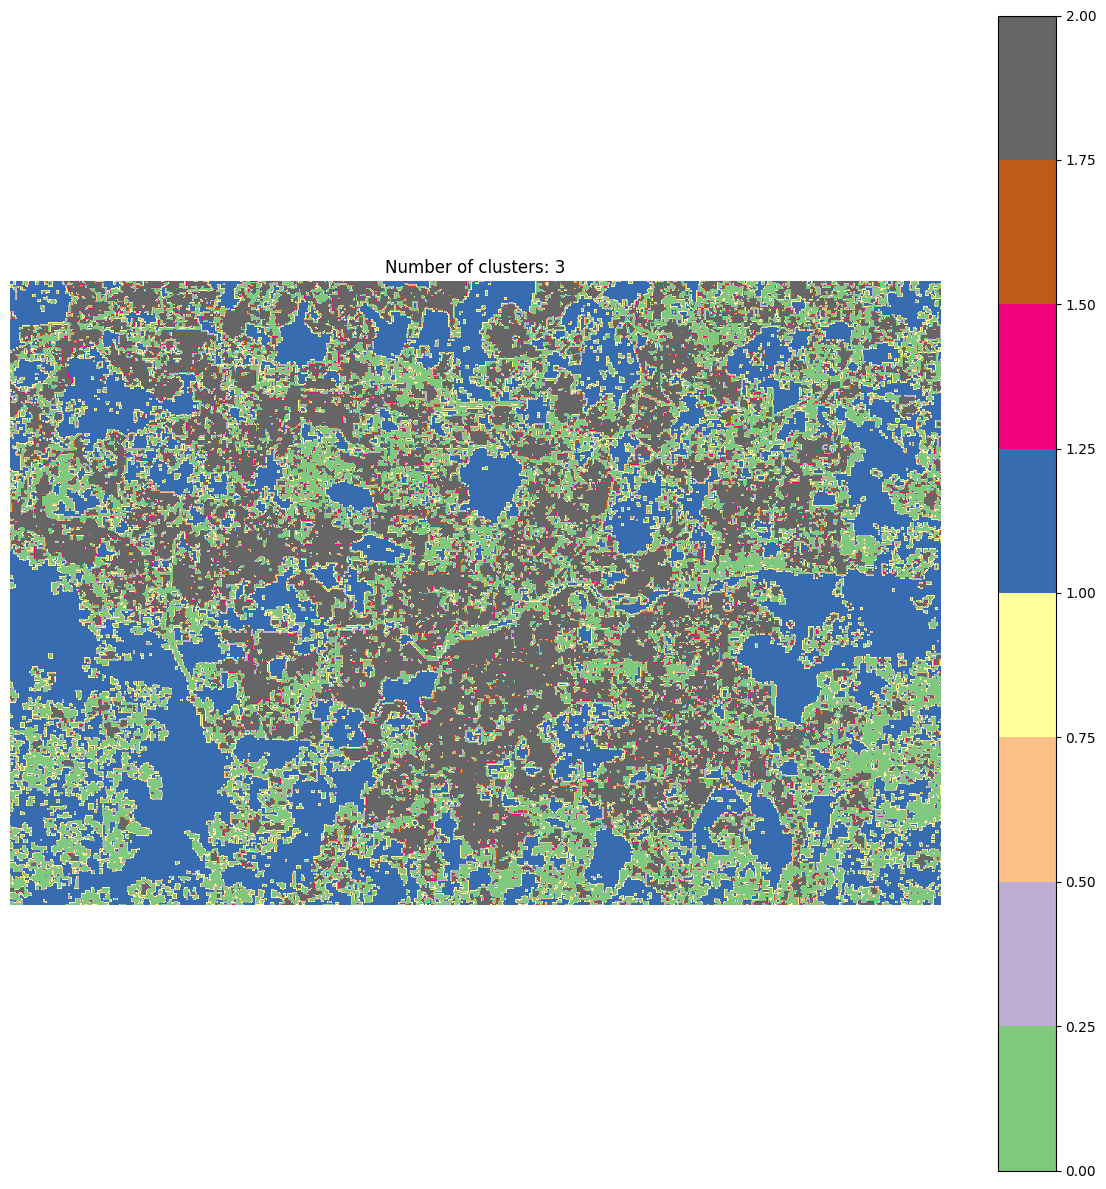

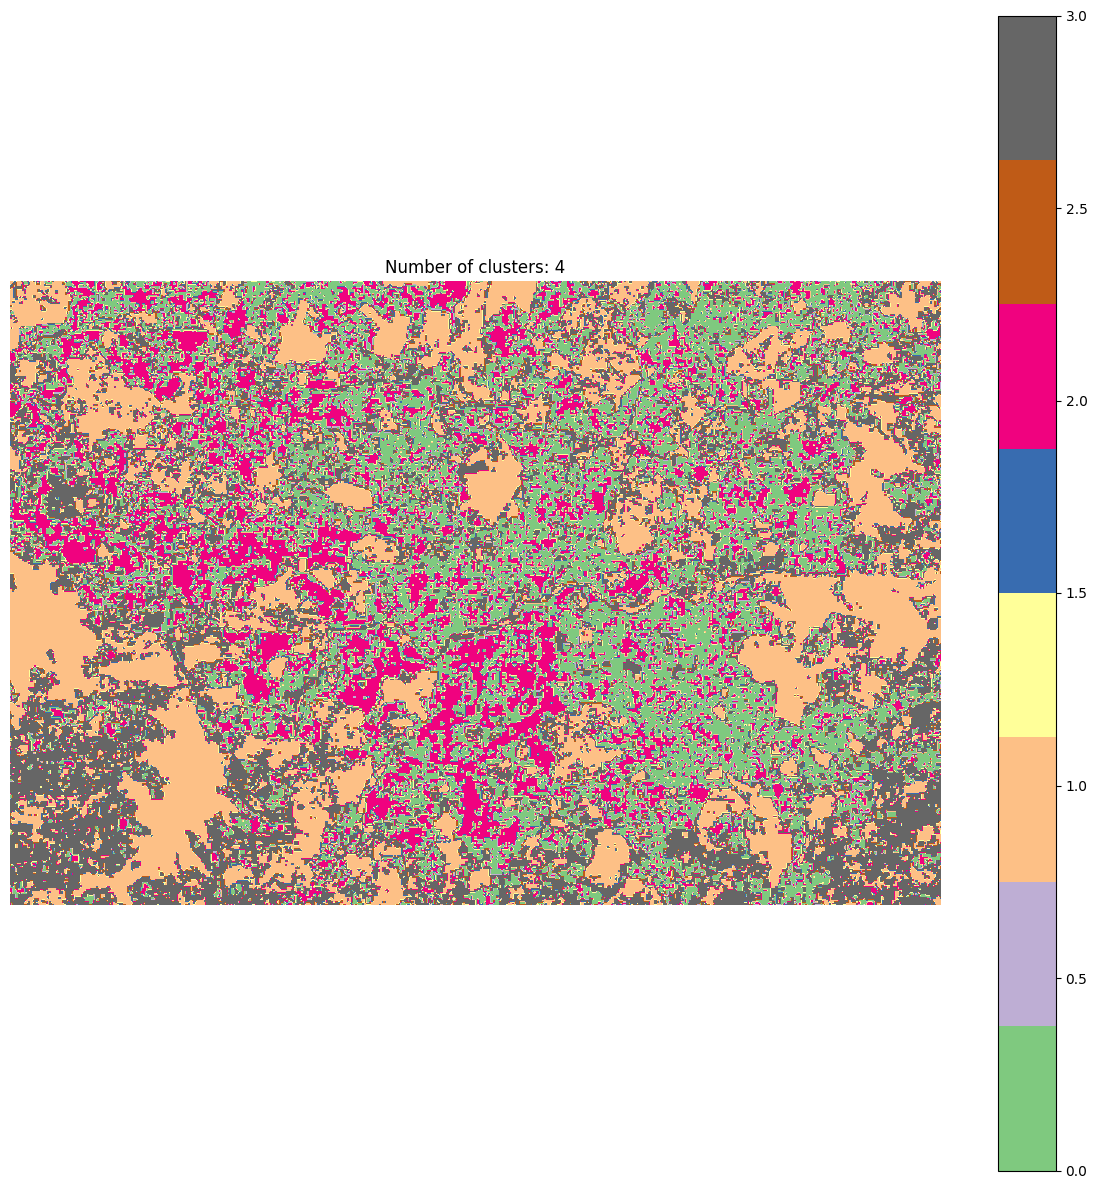

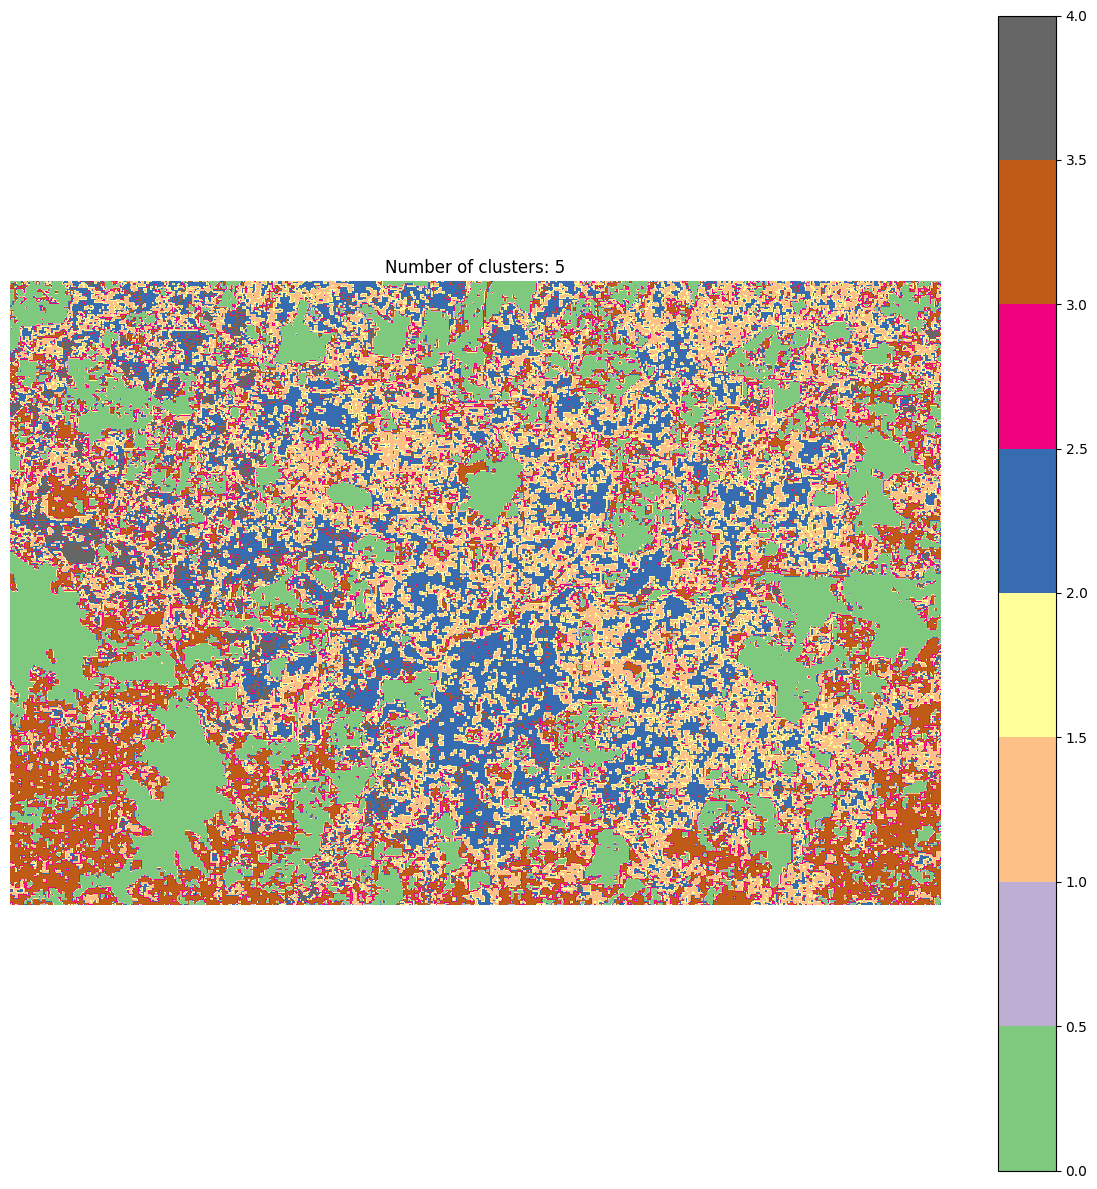

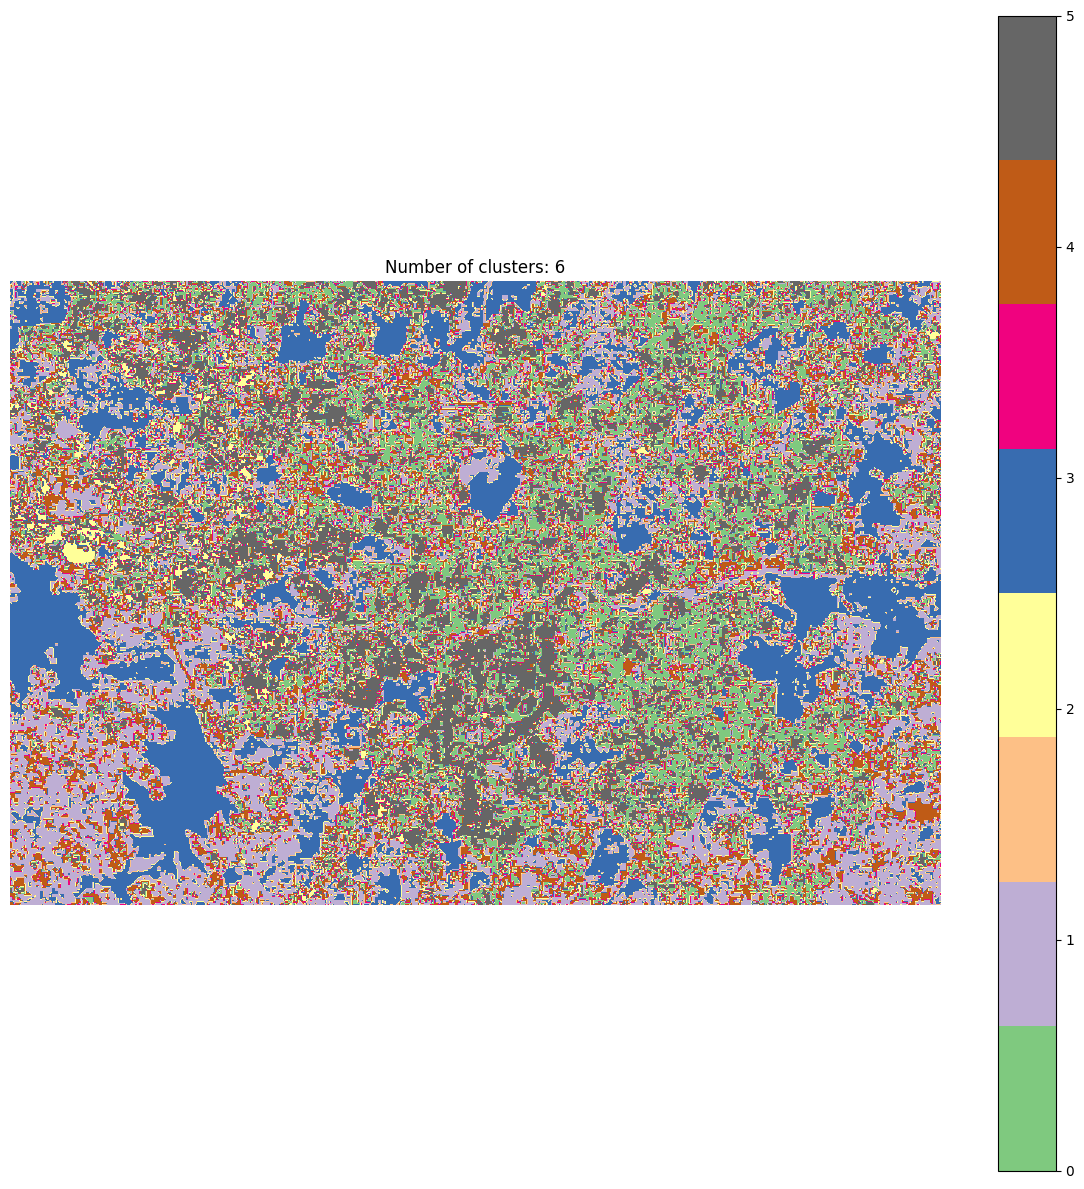

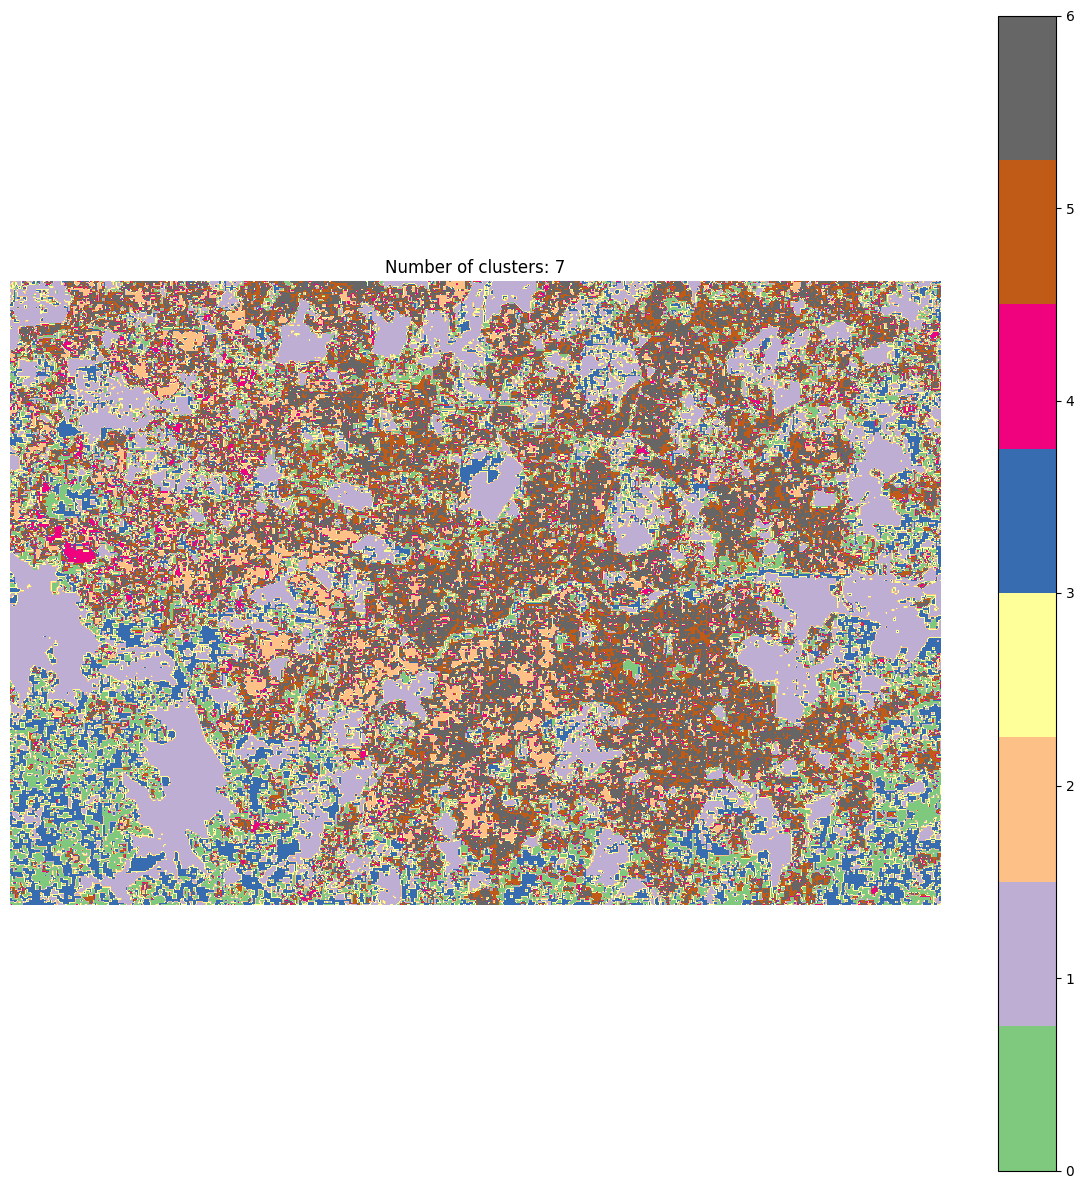

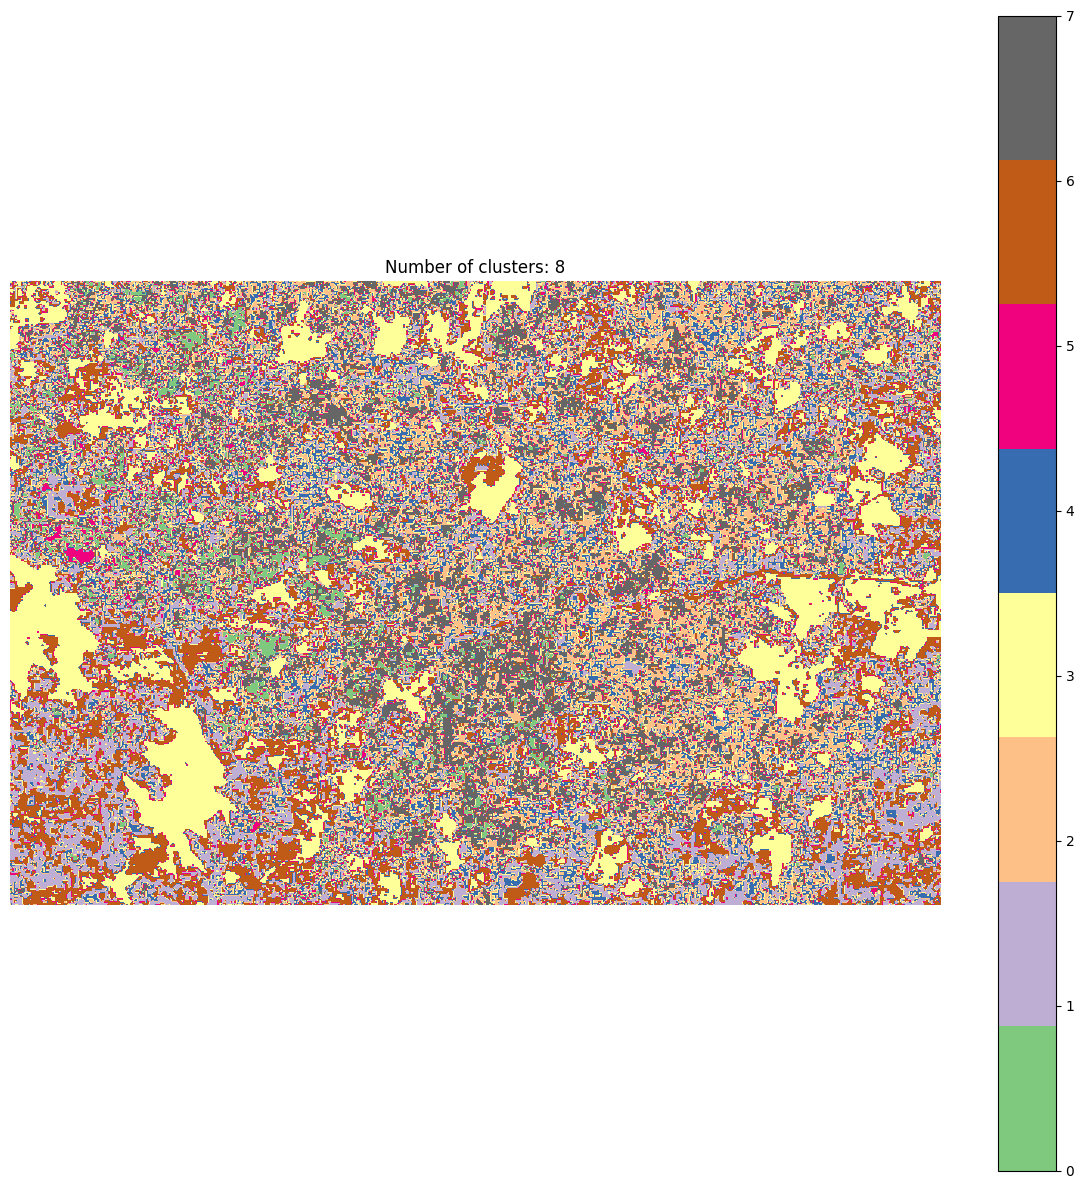

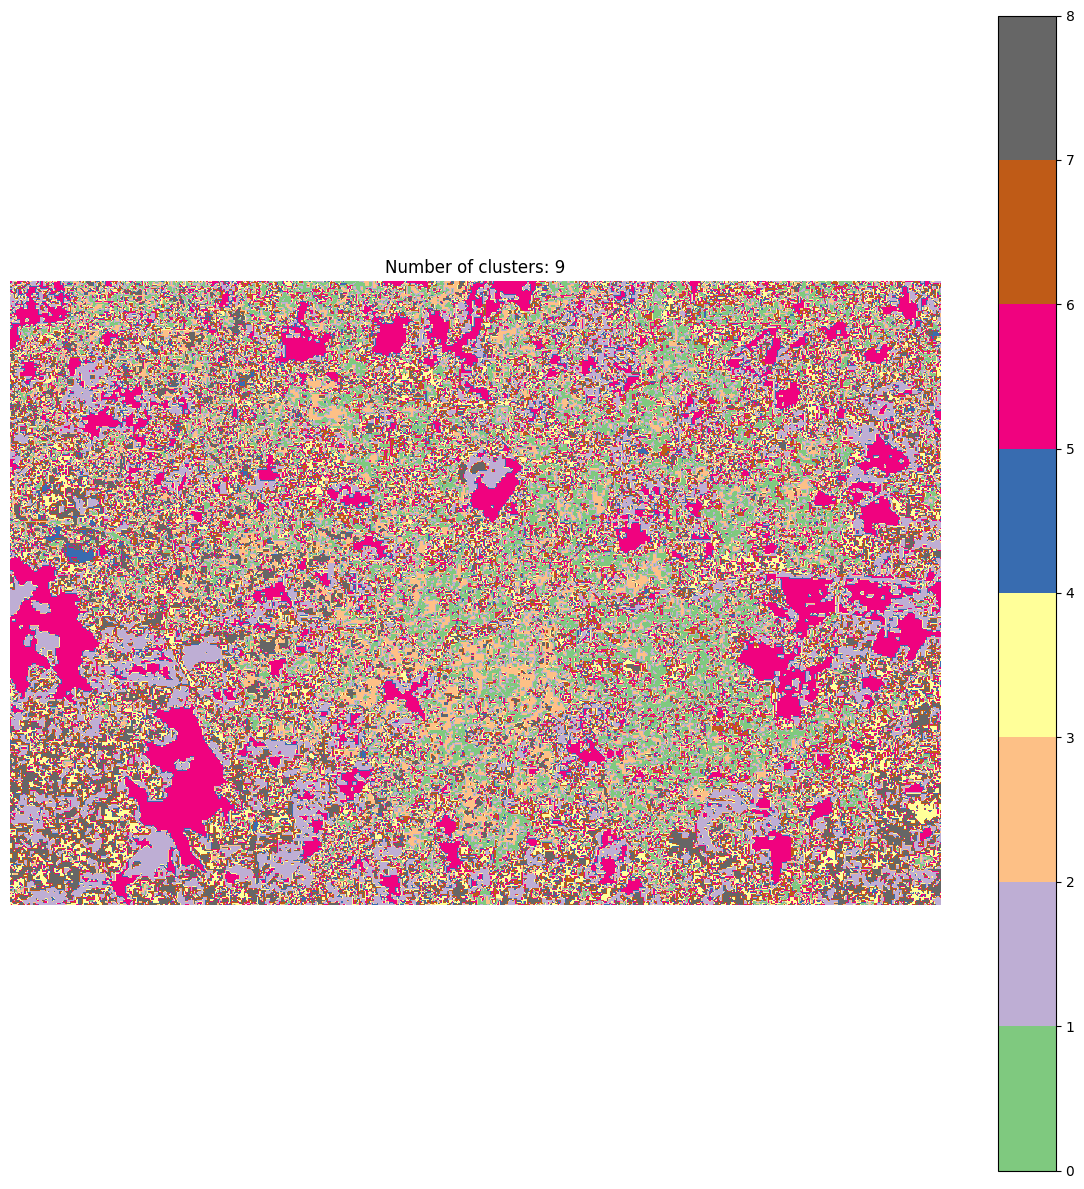

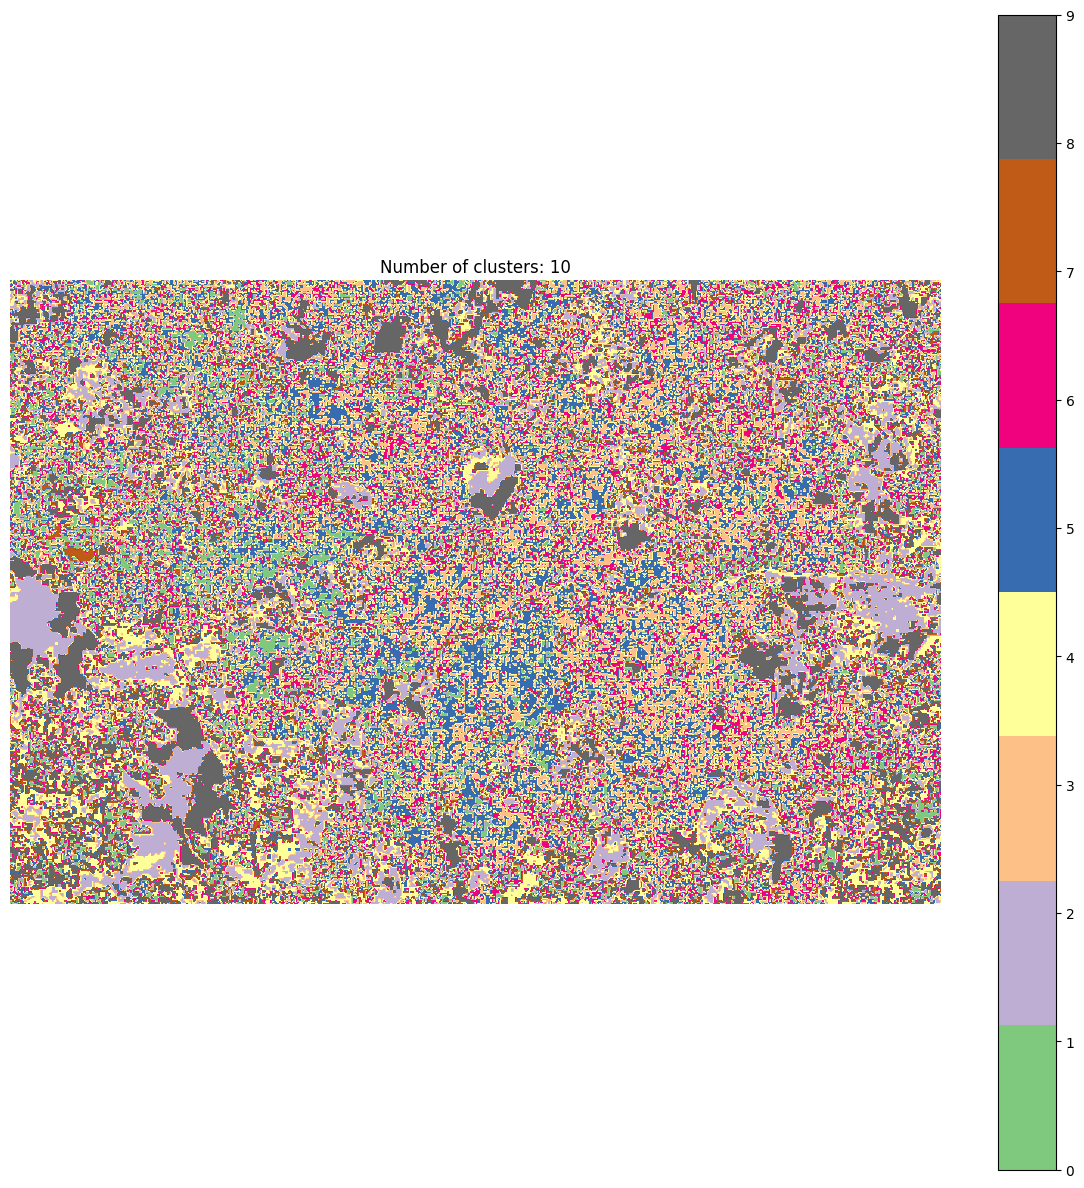

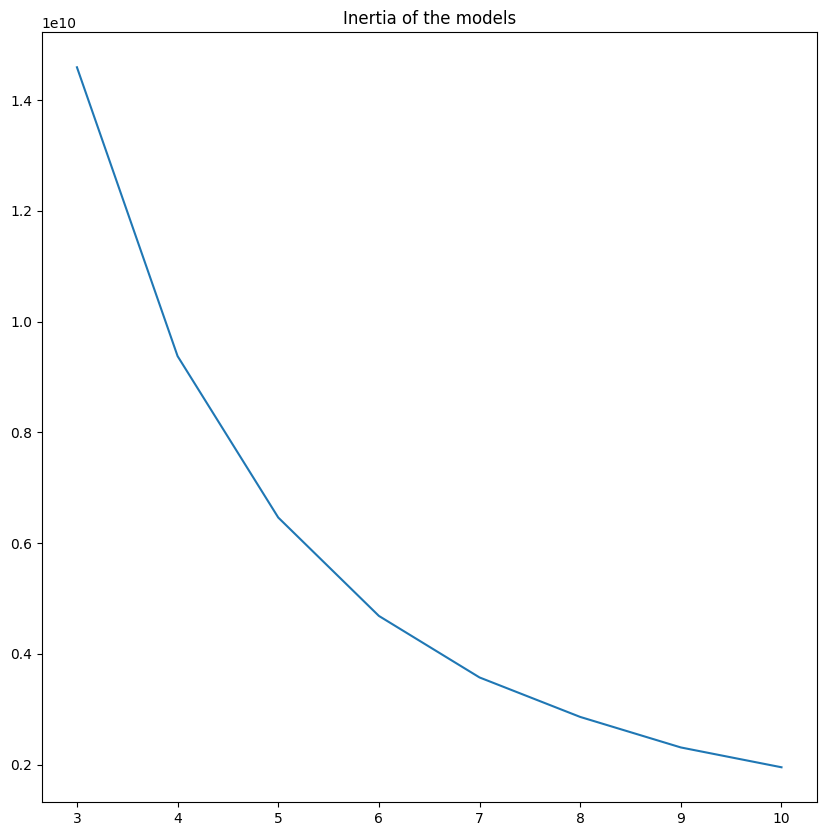

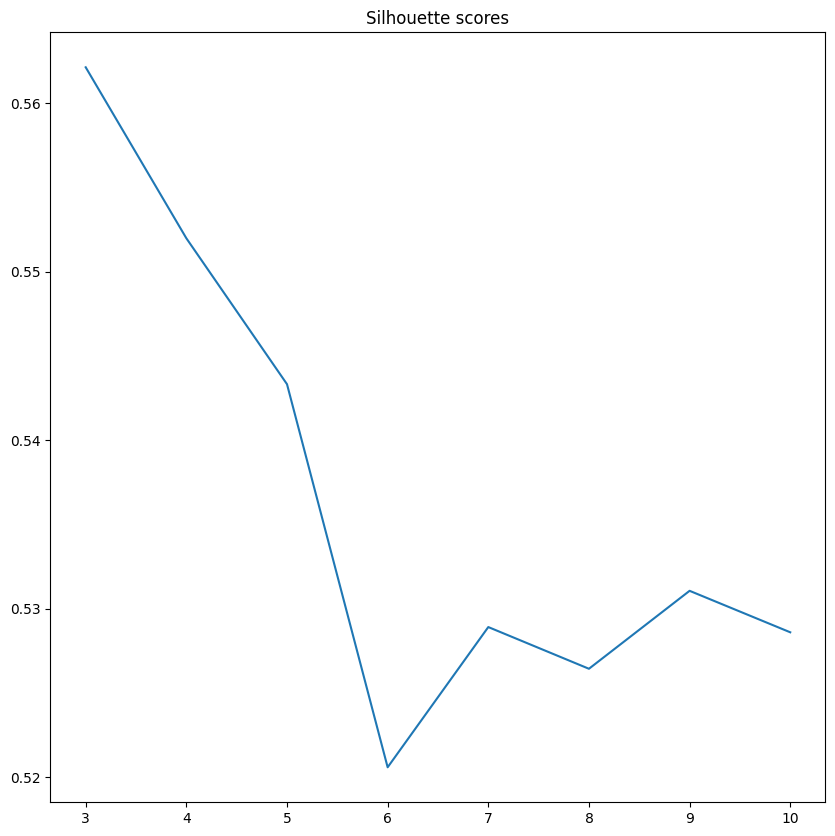

In [35]:
ranges = np.arange(3, 11, 1)
clustered_models.build_models(ranges)
clustered_models.show_clustered()
clustered_models.show_inertia()
clustered_models.show_silhouette_scores()